# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

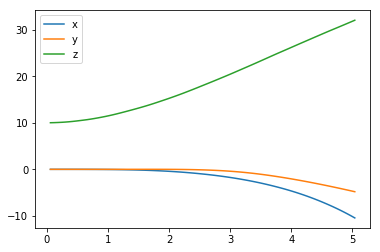

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

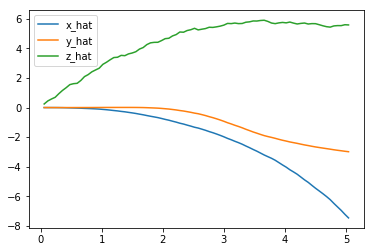

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

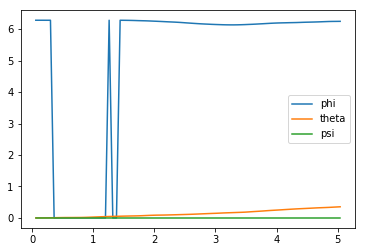

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

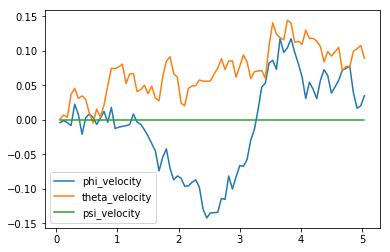

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

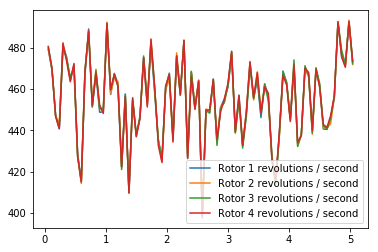

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-10.43004059  -4.80268404  32.01448065   6.24851812   0.35361885   0.        ]
[-7.45791525 -2.98433957  5.58413976]
[ 0.0350284   0.08926844  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.644 (best =   0.429), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Deep Deterministic Policy Gradients (DDPG)

You can use one of many different algorithms to design your agent, as long as it works with continuous state and action spaces. One popular choice is Deep Deterministic Policy Gradients or DDPG. It is actually an actor-critic method, but the key idea is that the underlying policy function used is deterministic in nature, with some noise added in externally to produce the desired stochasticity in actions taken.

Let's develop an implementation of the algorithm presented in the original paper:

Lillicrap, Timothy P., et al., 2015. Continuous Control with Deep Reinforcement Learning. [pdf](https://arxiv.org/pdf/1509.02971.pdf)

The two main components of the algorithm, the actor and critic networks can be implemented using most modern deep learning libraries, such as Keras or TensorFlow.


### DDPG: Actor (Policy) Model
A very simple actor model defined using Keras can be found in DDPG_actor.py.

Note that the raw actions produced by the output layer are in a [0.0, 1.0] range (using a sigmoid activation function). So, we add another layer that scales each output to the desired range for each action dimension. This produces a deterministic action for any given state vector. A noise will be added later to this action to produce some exploratory behavior.

Another thing to note is how the loss function is defined using action value (Q value) gradients:

action_gradients = layers.Input(shape=(self.action_size,))
loss = K.mean(-action_gradients * actions)

These gradients will need to be computed using the critic model, and fed in while training. Hence it is specified as part of the "inputs" used in the training function:

self.train_fn = K.function(
   inputs=[self.model.input, action_gradients, K.learning_phase()],
    outputs=[],
    updates=updates_op)


### DDPG: Critic (Value) Model

A corresponding critic model can be found in DDPG_critic.py. 

It is simpler than the actor model in some ways, but there some things worth noting. Firstly, while the actor model is meant to map states to actions, the critic model needs to map (state, action) pairs to their Q-values. This is reflected in the input layers.

states = layers.Input(shape=(self.state_size,), name='states')
actions = layers.Input(shape=(self.action_size,), name='actions')

These two layers can first be processed via separate "pathways" (mini sub-networks), but eventually need to be combined. This can be achieved, for instance, using the Add layer type in Keras (see [Merge Layers](https://keras.io/layers/merge/)):

net = layers.Add()([net_states, net_actions])

The final output of this model is the Q-value for any given (state, action) pair. However, we also need to compute the gradient of this Q-value with respect to the corresponding action vector, needed for training the actor model. This step needs to be performed explicitly, and a separate function needs to be defined to provide access to these gradients:

action_gradients = K.gradients(Q_values, actions)

self.get_action_gradients = K.function(
    inputs=[*self.model.input, K.learning_phase()],
    outputs=action_gradients)


### DDPG: Agent

We are now ready to put together the actor and policy models to build our DDPG agent. Note that we will need two copies of each model - one local and one target. This is an extension of the "Fixed Q Targets" technique from Deep Q-Learning, and is used to decouple the parameters being updated from the ones that are producing target values.

Notice that after training over a batch of experiences, we could just copy our newly learned weights (from the local model) to the target model. However, individual batches can introduce a lot of variance into the process, so it's better to perform a soft update, controlled by the parameter tau.

## Ornstein–Uhlenbeck Noise

We'll use a specific noise process that has some desired properties, called the [Ornstein–Uhlenbeck process](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process). It essentially generates random samples from a Gaussian (Normal) distribution, but each sample affects the next one such that two consecutive samples are more likely to be closer together than further apart. In this sense, the process in Markovian in nature.

Why is this relevant to us? We could just sample from Gaussian distribution, couldn't we? Yes, but remember that we want to use this process to add some noise to our actions, in order to encourage exploratory behavior. And since our actions translate to force and torque being applied to a quadcopter, we want consecutive actions to not vary wildly. Otherwise, we may not actually get anywhere! Imagine flicking a controller up-down, left-right randomly!

Besides the temporally correlated nature of samples, the other nice thing about the OU process is that it tends to settle down close to the specified mean over time. When used to generate noise, we can specify a mean of zero, and that will have the effect of reducing exploration as we make progress on learning the task.

In [7]:
## TODO: Train your agent here.
import sys
import pandas as pd
import numpy as np
from agents.DDPG_agent import DDPG
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 100.])
init_pose = np.array([0., 0., 10., 0., 0., 0.])
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task) 
worst_score = np.inf
best_score = -np.inf
reward_log = "reward.txt"

reward_labels = ['episode', 'reward']
reward_results = {x : [] for x in reward_labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    print('\nInit state:', state)
    score = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(best_score , score)
        worst_score = min(worst_score , score)
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f} , worst = {:7.3f})".format(
               i_episode, score, best_score, worst_score), end="")
            print('\nEnd state:', state[:6])
            break
    reward_results['episode'].append(i_episode)
    reward_results['reward'].append(score)
    sys.stdout.flush()


Init state: [  0.   0.  10.   0.   0.   0.]
Episode =    1, score = 162.583 (best = 162.583 , worst =   2.146)
End state: [ 0.25954015  2.78707326  0.          2.91938049  4.68877437  0.        ]

Init state: [  0.   0.  10.   0.   0.   0.]
Episode =    2, score = 162.567 (best = 162.583 , worst =   2.146)
End state: [-0.63806332 -1.23728549  0.          2.50347708  3.12739881  0.        ]

Init state: [  0.   0.  10.   0.   0.   0.]
Episode =    3, score = 160.499 (best = 162.583 , worst =   2.146)
End state: [-0.1589928   0.5583883   0.          1.91554652  4.26055036  0.        ]

Init state: [  0.   0.  10.   0.   0.   0.]
Episode =    4, score = 166.854 (best = 166.854 , worst =   2.146)
End state: [ 2.10935685  0.92438377  0.          2.44880898  3.75992958  0.        ]

Init state: [  0.   0.  10.   0.   0.   0.]
Episode =    5, score = 204.939 (best = 204.939 , worst =   2.146)
End state: [-8.38000676 -4.09441068  0.          1.53776591  2.90917405  0.        ]

Init state: [ 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

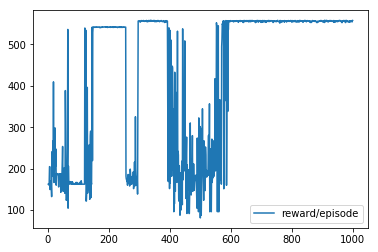

In [8]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(reward_results['episode'], reward_results['reward'], label='reward/episode')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I worked on the takeoff task, with an init pose of [0,0,10] and a target pose of [0,0,100]. I first used the given reward including the absolute difference between target pose and init pose. The agent performed poorly due to big variations. I did some scaling and then applied a sigmoid in order to keep the reward between 0 and 1. The agent learned well in the beginning, but stopped improving after some epochs, probably due to vanishing gradient. So I used a tangens hyperbolicus to avoid vanishing gradient and the results looked better.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I tried several methods for discretization first. I tried a grid approach and a Deep Q-Network (DQN) in PyTorch. However, I couldn't figure out how to deal with the continuous action space because DQN needs a discrete action space. So I used a Deep Deterministic Policy Gradients (DDPG) approach instead, which worked well. I used a discount factor gamma of 0.99. The network consists of an input layer, three hidden layers with relu activations and an output layer with sigmoid activation.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: I found this task quite hard compared to the simple grid world examples we solved in the lessons before. The agent didn't learn anything in many attempts, so I really had to tune the reward function. There was an aha moment when the agent suddenly worked well, and then the performance stayed good until the end, the rewards were nearly constant over the last episodes.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: I found the project quite difficult because I tried to work on a different approach than DDPG first. Even with DDPG, it took quite some time to tune the parameters until the agent finally learned. I found it interesting that the quadcopter often had aha moments when suddenly the strategy changed and it worked much better instead of slowly improving.